# Learn about Obi-Wan Kenobi

Are you a star wars fan? If not, this exercise will help you learn about one of the most important character of the saga: Obi-Wan Kenobi. We will scrap a wikipedia page and create a word cloud to understand what comes out of the article. 

* To focus on NLP, let's use the following code to retrieve a clean HTML page from a variable. We will see later in the program how it works: 

```
import requests
from bs4 import BeautifulSoup
r = requests.get( "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi" )
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = [ ]
for p in soup.find_all("p"):
  corpus.append(p.text)
```

In [1]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')
 
corpus = []
for p in soup.find_all("p"):
  corpus.append(p.text)

# Visualization of first element
corpus[:1]

['\n\t\tPages pour les rédacteurs déconnectés en savoir plus\n']

* We need to install `spacy` modules corresponding to the language specifics (in this case French). So install `en_core_news_sm`. 
  * Feel free to help you with documentation: [English](https://spacy.io/models/fr)

In [2]:
!python -m spacy download fr_core_news_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


* Since text is in french, import now `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [3]:
# Import spacy and initialize french language
import fr_core_news_sm
nlp = fr_core_news_sm.load()

* For the rest, we need to create a complete corpus of text in a variable. This is a best-practice in the use of spacy. So you will need to create a clean corpus of text. You can do this with the help of : 
  * join()
  * strip() 
  
* Make some basic cleanings :
  * remove special characters
  * make sure there are no uppercase

In [4]:
# Stripped corpus of text
stripped_corpus = [text.strip() for text in corpus]

# Join corpus to make one full string
clean_corpus = " ".join(stripped_corpus)

# Remove punctuation and lowercase
import re
clean_corpus = re.sub(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", "", clean_corpus).lower()

# Visualize first 100 characters
print("{}...".format(clean_corpus[:100]))

pages pour les rédacteurs déconnectés en savoir plus pour les articles homonymes voir obiwan kenobi ...


* Now load your clean corpus in a `doc` object.

In [5]:
doc = nlp(clean_corpus)

* With the `wordcloud` library, create a first word cloud 

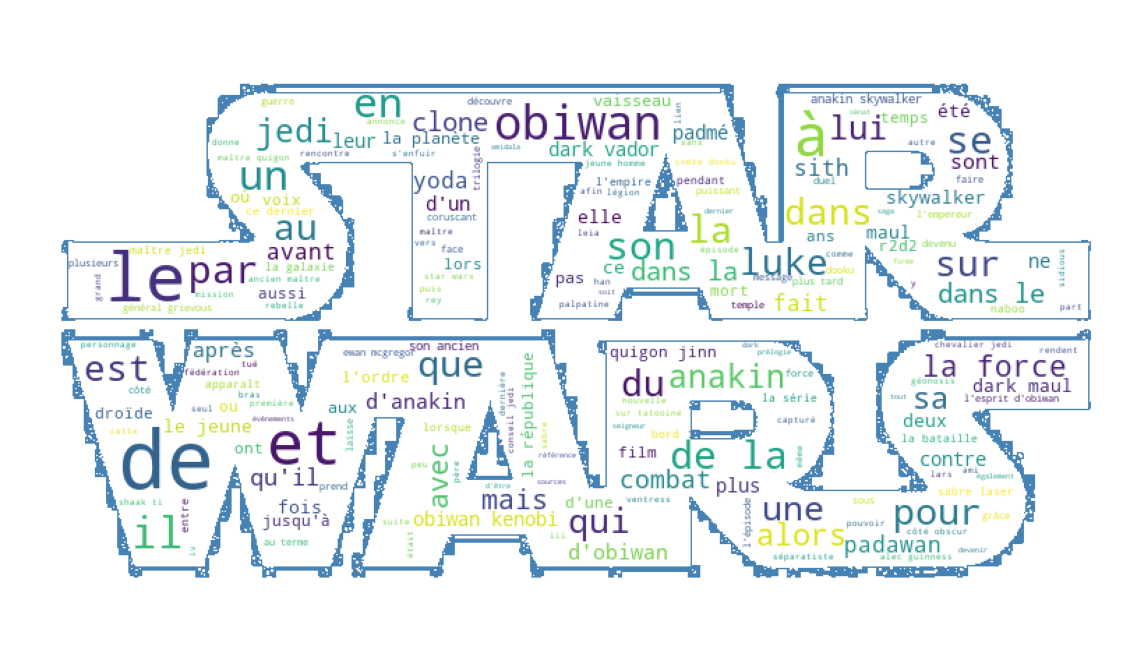

In [6]:
# Import wordcloud and matplotlib
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import wordcloud

starwars_mask = np.array(Image.open("starwars_logo.jpg"))

# Instanciate wordcloud
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask)

# Generate wordcloud 
cloud = wd.generate(doc.text)

# Show plot
plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

* Now import the stop-words present in `spacy`

In [7]:
# Import Stop words 
from spacy.lang.fr.stop_words import STOP_WORDS

# Visualize first 10 words
for i, word in enumerate(STOP_WORDS):
    if i < 10:
        print(word)
    else:
         break

voilà
différente
ou
tend
c'
dix-huit
me
devant
avons
elle


* Make a word cloud again without the stop words

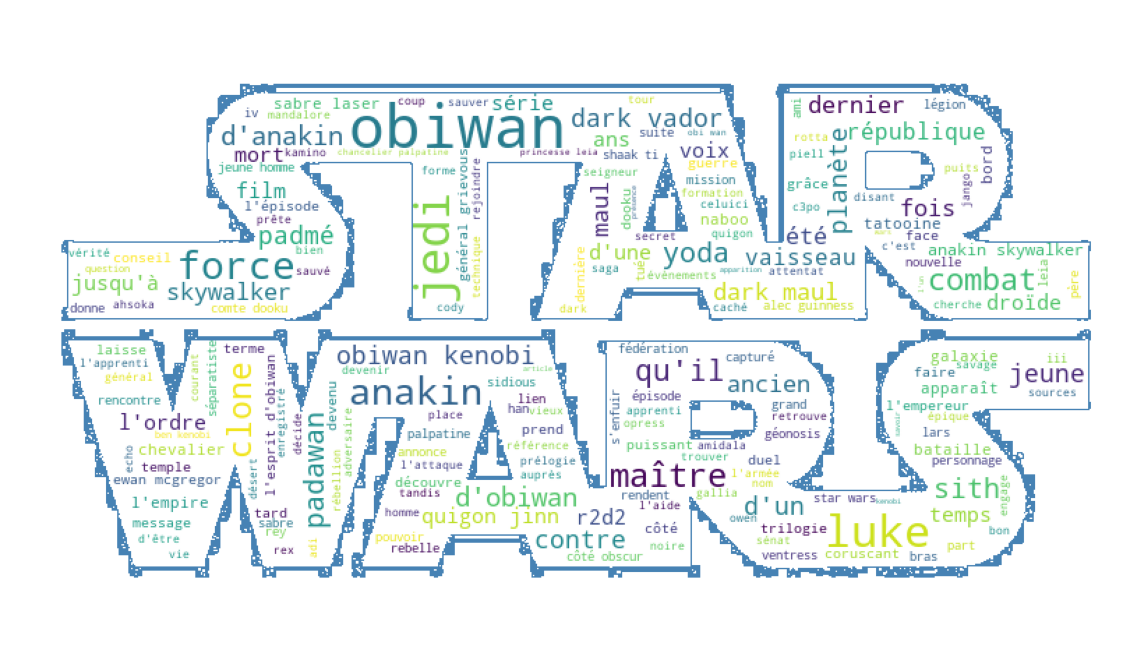

In [8]:
# Import wordcloud and matplotlib
# Import matplotlib and wordcloud 

# Instanciate WordCloud 
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask, 
                         stopwords = STOP_WORDS)

# Generate wordcloud 
cloud = wd.generate(doc.text)

# show
plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

* We would need to have a corpus of lemmatized words, recreate a corpus of lemmatized words and visualize your new word cloud

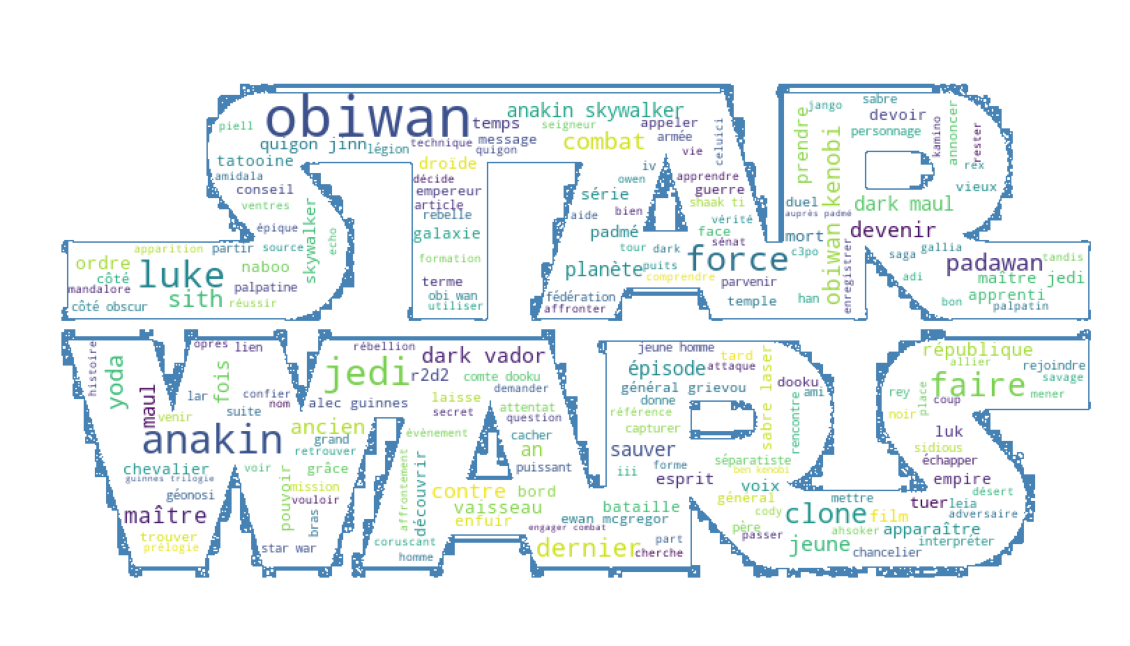

In [9]:
# Create lemmatization 
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS]

# Create a new corpus 
corpus_lemma = " ".join(lemma)

# Create a word cloud 
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask, 
                         stopwords=STOP_WORDS)

# Generate wordcloud
cloud = wd.generate(corpus_lemma)

# Visualize wordcloud 
plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

* Let's push analysis further! Some words are really common in our corpus, find which of them

In [10]:
# Import pandas to create a series
import pandas as pd 

# Create a DataFrame of lemmatized token
lemmadf = pd.Series(lemma)

# Create a mask of all counted values greater than 22
common = lemmadf.value_counts()>15

# Apply mask
common = common[common]

#Visualize first ten terms 
common[:10]

obiwan    True
anakin    True
          True
jedi      True
luke      True
force     True
dark      True
faire     True
»         True
«         True
dtype: bool

* Update your list of stop words with the common words

In [11]:
# Update stop words 
new_stop_words = common.index

# Create a union of sets 
STOP_WORDS_updated = STOP_WORDS.union(new_stop_words)

* Create a new word cloud 

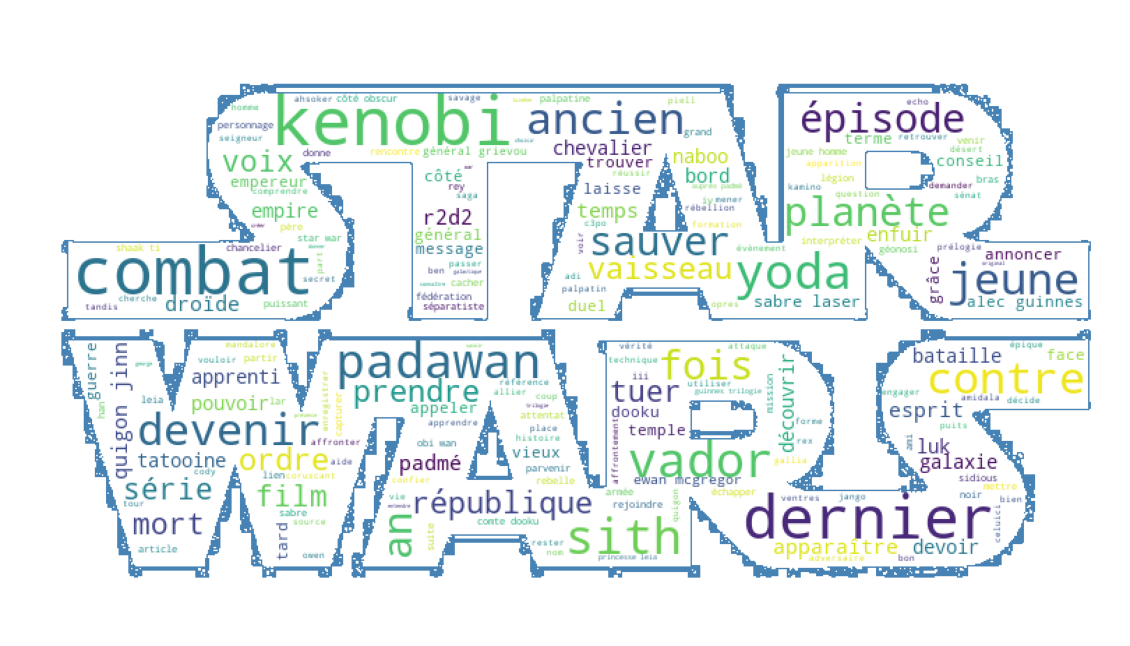

In [12]:
# Create a word cloud 
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask, 
               stopwords=STOP_WORDS_updated)

# Generate wordcloud
cloud = wd.generate(corpus_lemma)

# Visualize wordcloud 
plt.figure(figsize = (20, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

* We will now start building a tf-idf matrix. Let's first create a DataFrame containing our lemmatized corpus without the updated stop words.

In [13]:
# Create lemmatization 
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS_updated]

# Create a new corpus 
corpus_lemma = " ".join(lemma)

# Create a Series with 1 document
corpus_series = pd.Series(corpus_lemma)

# Include Series in a DataFrame for simpler manipulations 
corpus_df = pd.DataFrame(corpus_series, columns=["documents"])
corpus_df

,documents
0,page rédacteur déconnecter savoir article homo...


* Let's create now a TF-IDF matrix using `sklearn`

In [14]:
# Tfidf transformer 
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_df['documents'])

# X is a generator. We can transform that as an array
dense = X.toarray()
dense

array([[0.01167536, 0.01167536, 0.01167536, ..., 0.01167536, 0.03502608,
        0.01167536]])

* Visualize most important words using `seaborn`, `matplotlib` or `plotly`

> Help: You can create a dataframe, transpose it and then easily create a visualization

In [15]:
# Creating a DataFrame with all the words and tf-idf score 
tfid_df = pd.DataFrame(dense, 
                        columns=[x for x in vectorizer.get_feature_names()])

tfid_df

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,19,200,200056,2004,2014,2016,2019,24,25,26,...,épique,épisode,équilibre,équipe,étendre,étoile,étouffe,étudier,évènement,événement
0,0.011675,0.011675,0.011675,0.011675,0.023351,0.011675,0.011675,0.011675,0.011675,0.011675,...,0.035026,0.105078,0.011675,0.011675,0.011675,0.023351,0.011675,0.011675,0.035026,0.011675


In [16]:
# Transpose dataframe
tfid_df = tfid_df.T

# Create a new token column 
tfid_df["token"] = tfid_df.index

tfid_df

,0,token
19,0.011675,19
200,0.011675,200
200056,0.011675,200056
2004,0.011675,2004
2014,0.023351,2014
...,...,...
étoile,0.023351,étoile
étouffe,0.011675,étouffe
étudier,0.011675,étudier
évènement,0.035026,évènement


In [17]:
# Sort the top 15 values by descending order
tfid_df.sort_values(by=0, ascending=False)[:15]

,0,token
combat,0.175130,combat
kenobi,0.175130,kenobi
jeune,0.163455,jeune
dernier,0.151780,dernier
sith,0.140104,sith
padawan,0.140104,padawan
vador,0.140104,vador
yoda,0.140104,yoda
padmé,0.116754,padmé
général,0.116754,général


In [18]:
# Import plotly express
import plotly.express as px

# Create bar chart
fig = px.bar(tfid_df.sort_values(by=0, ascending=False)[:15], x="token", y=0)

# Render chart
fig.show(renderer="iframe")